In [83]:
# Classifing MNIST images with a vanilla network in keras
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [84]:
mnist = fetch_openml('mnist_784') # already flatten

In [85]:
#sample = np.random.randint(70000, size=20000)
data = mnist.data #[sample]
target = mnist.target #[sample]

In [86]:
print(data.shape)
print(target.shape)

(70000, 784)
(70000,)


In [87]:
# we renormalized the data around 0 [-0.5, 0.5] rather than using the interval [0, 255]
norm_data = (data / 255) - 0.5
print(norm_data.shape)

(70000, 784)


In [88]:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, test_size=0.33, shuffle= True)

In [89]:
# Building the model: 3 layers
model_1 = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [90]:
# Compiling the model with classic hyperparameters
model_1.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [91]:
history_1 = model_1.fit(
    xtrain, 
    to_categorical(ytrain), 
    validation_split=0.2, 
    epochs=5, 
    batch_size=32
)

Epoch 1/5
1173/1173 [==============================] - 3s 2ms/step - loss: 2.0424 - accuracy: 0.7941 - val_loss: 0.5342 - val_accuracy: 0.8656
Epoch 2/5
1173/1173 [==============================] - 2s 2ms/step - loss: 0.4511 - accuracy: 0.8900 - val_loss: 0.4640 - val_accuracy: 0.8956
Epoch 3/5
1173/1173 [==============================] - 2s 2ms/step - loss: 0.3463 - accuracy: 0.9144 - val_loss: 0.3595 - val_accuracy: 0.9166
Epoch 4/5
1173/1173 [==============================] - 2s 2ms/step - loss: 0.3081 - accuracy: 0.9237 - val_loss: 0.3425 - val_accuracy: 0.9256
Epoch 5/5
1173/1173 [==============================] - 2s 2ms/step - loss: 0.2643 - accuracy: 0.9336 - val_loss: 0.3205 - val_accuracy: 0.9268


In [92]:
# Store the predictions
predictions = model_1.predict(xtest) # It contains a 10D array with the probability for each category (i.e. numbers from 0 to 9)
predicted = np.argmax(predictions, axis=1) # we recover the most probable number

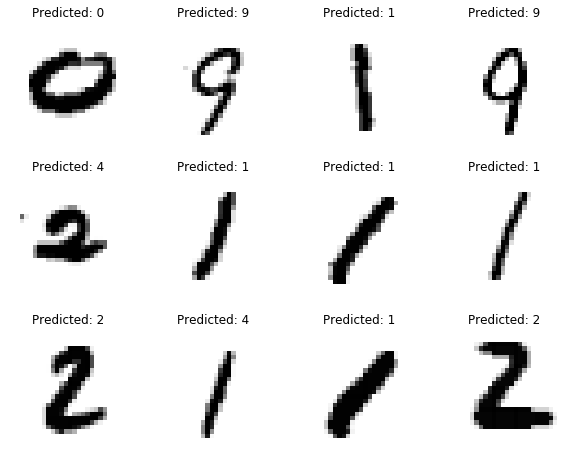

In [93]:
# We transform the data in form of images
images = xtest.reshape((-1, 28, 28))

# We randomly pick 12 images
select = np.random.randint(images.shape[0], size=12)

fig = plt.figure(figsize=(10,8))
# We plot the images with their prediction
for index, value in enumerate(select):
    fig.add_subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format(predicted[value]))


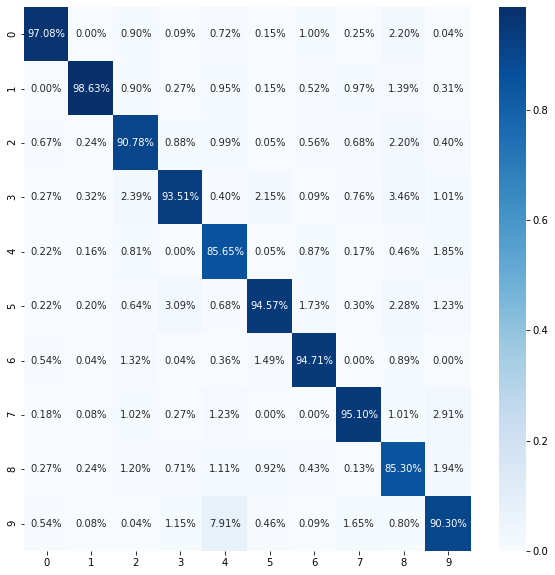

In [94]:
# ytest contains string numbers which have to be converted:
ytest = ytest.astype(np.float)
# On a more quantitative level we can plot the confusion matrix
cf_matrix = confusion_matrix(ytest, predicted)
plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix / sum(cf_matrix), fmt = '.2%', annot=True, cmap='Blues')

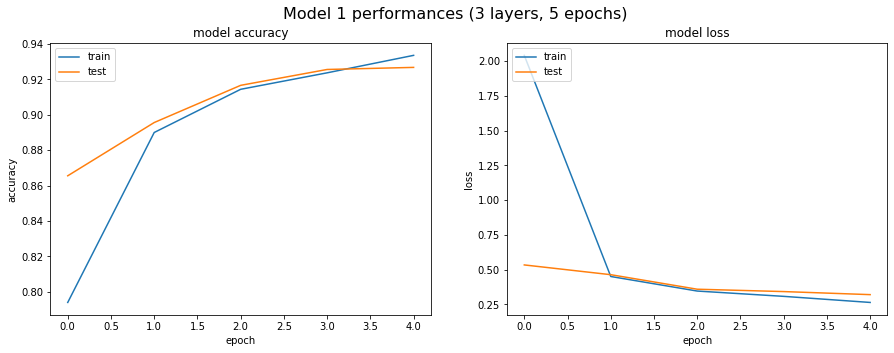

In [95]:
# Let's see the performances of the model over epochs:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.title("Accuracy")
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig.add_subplot(1,2,2)
plt.title("Loss")
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig.suptitle('Model 1 performances (3 layers, 5 epochs)', fontsize=16)
plt.show()

In [103]:
# Evaluating the model.
score_1 = model_1.evaluate(
  xtest,
  to_categorical(ytest)
)
print('This model achieved {:.3f} test loss and {:.2f} % accuracy'.format(score_1[0], score_1[1]*100))

722/722 [==============================] - 1s 1ms/step - loss: 0.3227 - accuracy: 0.9249
This model achieved 0.323 test loss and 92.49 % accuracy


In [97]:
# Let's try a deeper model on 10 epochs:
model_2 = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [98]:
# Compiling the model with classic hyperparameters
model_2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_30 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_31 (Dense)             (None, 10)                650       
Total params: 63,370
Trainable params: 63,370
Non-trainable params: 0
_________________________________________________________________


In [99]:
history_2 = model_2.fit(
    xtrain, 
    to_categorical(ytrain), 
    validation_split=0.2, 
    epochs=10, 
    batch_size=64
)

Epoch 1/10
587/587 [==============================] - 2s 3ms/step - loss: 1.1277 - accuracy: 0.7923 - val_loss: 0.3668 - val_accuracy: 0.8916
Epoch 2/10
587/587 [==============================] - 1s 2ms/step - loss: 0.2920 - accuracy: 0.9174 - val_loss: 0.2434 - val_accuracy: 0.9338
Epoch 3/10
587/587 [==============================] - 2s 3ms/step - loss: 0.2165 - accuracy: 0.9363 - val_loss: 0.2037 - val_accuracy: 0.9428
Epoch 4/10
587/587 [==============================] - 2s 4ms/step - loss: 0.1706 - accuracy: 0.9497 - val_loss: 0.1901 - val_accuracy: 0.9485
Epoch 5/10
587/587 [==============================] - 2s 3ms/step - loss: 0.1499 - accuracy: 0.9550 - val_loss: 0.1904 - val_accuracy: 0.9464
Epoch 6/10
587/587 [==============================] - 2s 3ms/step - loss: 0.1368 - accuracy: 0.9587 - val_loss: 0.1913 - val_accuracy: 0.9468
Epoch 7/10
587/587 [==============================] - 2s 3ms/step - loss: 0.1187 - accuracy: 0.9629 - val_loss: 0.1761 - val_accuracy: 0.9549
Epoch 

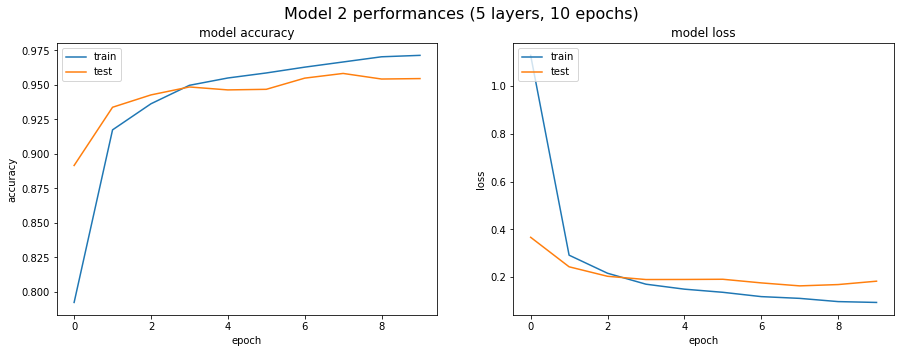

In [100]:
# Let's see the performances of the model over epochs:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.title("Accuracy")
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig.add_subplot(1,2,2)
plt.title("Loss")
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig.suptitle('Model 2 performances (5 layers, 10 epochs)', fontsize=16)
plt.show()

In [102]:
# Evaluating the model.
score_2 = model_2.evaluate(
  xtest,
  to_categorical(ytest)
)
print('This model achieved {:.3f} test loss and {:.2f} % accuracy'.format(score_2[0], score_2[1]*100))

722/722 [==============================] - 1s 1ms/step - loss: 0.1946 - accuracy: 0.9516
This model achieved 0.195 test loss and 95.16 % accuracy
